# Retos: Mini-Proyecto de mitad de módulo

### 1. Objetivos:

- Practicar la aplicación de los modelos y algoritmos de la sesión
 
---
    
### 2. Desarrollo:

En este Reto vamos a ver qué tan buenas predicciones podemos realizar entre pares de variables de nuestro dataset 'wine_quality_red-clean.csv'. Nuestros intentos en este momento van a ser bastante básicos, puesto que el mundo de las predicciones es tan vasto y complejo, que no hay manera de aprender todos los pequeños detalles durante este curso. Pero de todas maneras, lo que harás en este momento es un gran avance hacia desarrollar la capacidad de aplicar estas herramientas en el mundo real.

Realiza los siguientes pasos:

### Regresión Lineal

1. Lee tu dataset y utilizando gráficas de dispersión, y complementando el análisis con promedios, medianas, desviación estándar, boxplots e histogramas, elimina del dataset los valores que consideres como atípicos.
2. Utiliza una gráfica de pares (pairplot) para graficar tus variables y asegurarte de que no se te escapó algún par de variables interesantes que no pudimos identificar con la matriz de correlaciones.
3. Elige 2 pares de variables que te parezcan más prometedores para realizar predicciones.
4. Si es necesario, realiza un poco más de limpieza en esos 2 pares. En este momento no importa si perdemos información
5. Por cada par, elige tu variable independiente y dependiente.
6. Crea un modelo de regresión lineal por cada par de variables y entrénalos.
7. Crea gráficas para cada par de variables donde podamos ver una gráfica de dispersión de todas las muestras y una gráfica lineal que represente cada modelo entrenado.
8. Obtén el coeficiente de determinación para cada una de tus regresiones.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../Datasets/wine_filtered.csv', index_col=0)
df = df.dropna()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [14]:
from sklearn.linear_model import LinearRegression

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


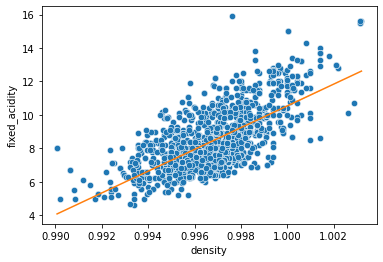

In [15]:
lr = LinearRegression()

serie_1 = df["density"]
serie_2 = df["fixed_acidity"]

lr.fit(serie_1.to_frame(), serie_2)

y_predict = lr.predict(serie_1.to_frame())

sns.scatterplot(serie_1, serie_2, s=40);
sns.lineplot(serie_1, y_predict, color='#FF7F0E');

In [20]:
np.power(df["density"].corr(df["fixed_acidity"]),2)

0.4607612011884379

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='citric_acid', ylabel='fixed_acidity'>

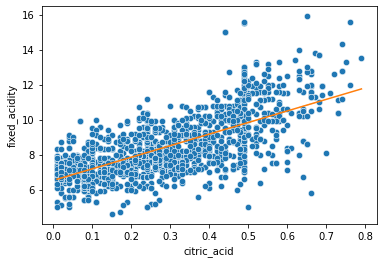

In [16]:
lr3 = LinearRegression()

serie_1 = df["citric_acid"]
serie_2 = df["fixed_acidity"]

lr3.fit(serie_1.to_frame(), serie_2)

y_predict = lr3.predict(serie_1.to_frame())

sns.scatterplot(serie_1, serie_2, s=40);
sns.lineplot(serie_1, y_predict, color='#FF7F0E')

In [19]:
np.power(df["citric_acid"].corr(df["fixed_acidity"]),2)

0.4685429865036403

### Bootstrap 

9. Elige una variable numérica. 
10. Si no lo haz hecho aún, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribucióny si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
11. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
12. Grafica cada una de las listas resultantes en un histograma.
13. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?
14. Ahora, obtén el error estándar de ambas medidas estadísticas. Utiliza el mínimo, el máximo y el rango para contextualizar tu error estándar y saber qué tan grande o pequeño es.
15. Ahora, para cada medida estadística obtén los intervalos de confianza de 90%, 95% y 99%. Compara los resultados.

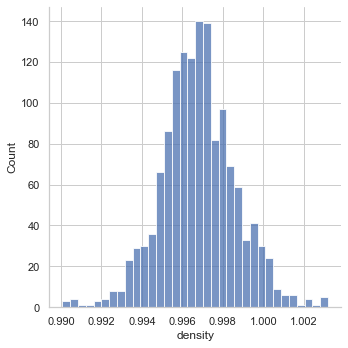

In [109]:
sns.displot(df["density"])

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='density'>

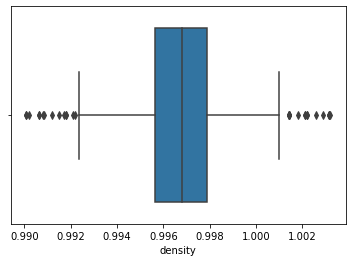

In [28]:
sns.boxplot(df["density"])

In [29]:
dens = df["density"]

In [35]:
dens.sample(5)

842     0.99708
853     0.99652
860     0.99746
79      0.99720
1490    0.99344
Name: density, dtype: float64

###  5 muestras

In [37]:
means = []

for i in range(100_000):
    sample = dens.sample(n = 5, replace = True)
    means.append(sample.mean()) 
    
serie_means = pd.Series(means)
    
    
    

###  20 %

In [42]:
means2 = []

for i in range(100_000):
    sample2 = dens.sample(frac = 0.2 , replace = True)
    means2.append(sample2.mean()) 
    
serie_means2 = pd.Series(means2)
    
    

###  90 %

In [44]:
means3 = []

for i in range(100_000):
    sample3 = dens.sample(frac = 0.9 , replace = True)
    means3.append(sample3.mean()) 
    
serie_means3 = pd.Series(means3)
    

---

### Histograma con 5 datos

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


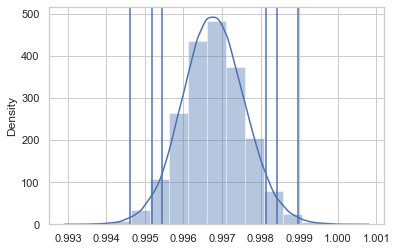

In [104]:
sns.set(style="whitegrid")
sns.distplot(serie_means, bins = 15)
li1 = serie_means.quantile(0.025)
ls1 = serie_means.quantile(0.975)
plt.axvline(li1)
plt.axvline(ls1)
li2 = serie_means.quantile(0.005)
ls2 = serie_means.quantile(0.995)
plt.axvline(li2)
plt.axvline(ls2)
li3 = serie_means.quantile(0.05)
ls3 = serie_means.quantile(0.95)
plt.axvline(li3)
plt.axvline(ls3)

### Histograma con 20% de datos

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


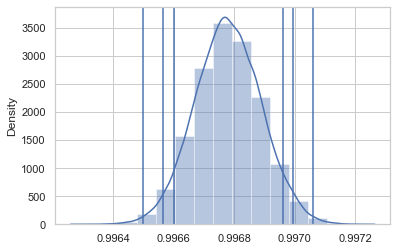

In [105]:
sns.set(style="whitegrid")
sns.distplot(serie_means2, bins = 15)
li1 = serie_means2.quantile(0.025)
ls1 = serie_means2.quantile(0.975)
plt.axvline(li1)
plt.axvline(ls1)
li2 = serie_means2.quantile(0.005)
ls2 = serie_means2.quantile(0.995)
plt.axvline(li2)
plt.axvline(ls2)
li3 = serie_means2.quantile(0.05)
ls3 = serie_means2.quantile(0.95)
plt.axvline(li3)
plt.axvline(ls3)

### Histograma con 90% de datos

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


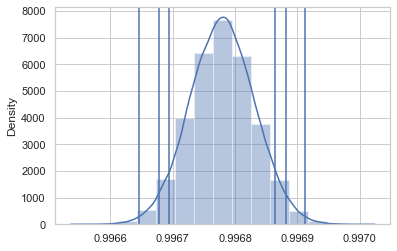

In [106]:
sns.set(style="whitegrid")
sns.distplot(serie_means3, bins = 15)
li1 = serie_means3.quantile(0.025)
ls1 = serie_means3.quantile(0.975)
plt.axvline(li1)
plt.axvline(ls1)
li2 = serie_means3.quantile(0.005)
ls2 = serie_means3.quantile(0.995)
plt.axvline(li2)
plt.axvline(ls2)
li3 = serie_means3.quantile(0.05)
ls3 = serie_means3.quantile(0.95)
plt.axvline(li3)
plt.axvline(ls3)

---

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

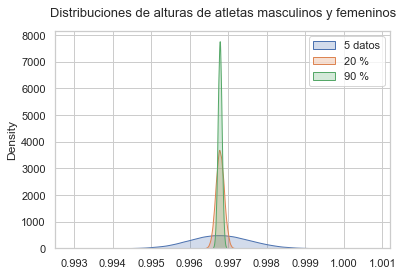

In [107]:
ax = sns.distplot(serie_means, hist=False, kde_kws = {'shade': True}, label='5 datos')
sns.distplot(serie_means2, hist=False, kde_kws = {'shade': True}, ax=ax, label='20 %')
sns.distplot(serie_means3, hist=False, kde_kws = {'shade': True}, ax=ax, label='90 %')

ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);
ax.legend(loc='upper right');

In [85]:
from scipy.stats import skew, kurtosis
print(kurtosis(serie_means),  " - ", skew(serie_means),  " - ", serie_means.max()-serie_means.min(),  " - ",  serie_means.std())
print(kurtosis(serie_means2), " - ", skew(serie_means2),  " - ", serie_means2.max()-serie_means2.min(),  " - ",  serie_means2.std())
print(kurtosis(serie_means3), " - ", skew(serie_means3),  " - ", serie_means3.max()-serie_means3.min(),  " - ",  serie_means3.std())

0.19731378776557795  -  0.03588499879834963  -  0.007405999999999691  -  0.0008192076419596773
0.01080635512741912  -  0.009765849847367133  -  0.0009392198581553712  -  0.00010933635924534479
-0.010980986268612991  -  0.0027115411436692757  -  0.0004573779527545785  -  5.1767490202310846e-05


### Regresión Lineal multiple

16. Explora las correlaciones que existen entre las variables del dataset.
17. Elige dos o más variables independientes y una variable dependiente.
18. Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.
19. Separa tus datos en dataset de entrenamiento y prueba usando `scikit-learn`.
20. Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
21. Evalúa tu modelo usando el dataset de prueba.
22. Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.
23. Entrena un modelo de Regresión Lineal Múltiple utilizando validación cruzada de K-iteraciones.
24. Obtén el promedio de tus scores y el nivel de incertidumbre.
25. Compara tu resultado con el resultado obtenido en el punto 21.